In [4]:
import numpy as np

In [5]:
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"

In [6]:
t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t2 = np.loadtxt(us_file_path,delimiter=",",dtype="int")

In [7]:
print(t1)

[[4394029 7860119 5845909 ...  142463 2162240  515000]
 [ 320053  185853  576597 ...    4231   41032   34727]
 [   5931   26679   39774 ...     148    1384     195]
 [  46245       0  170708 ...     279    4737    4722]]


In [8]:
print(t2)

[[4394029  320053    5931   46245]
 [7860119  185853   26679       0]
 [5845909  576597   39774  170708]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]


In [9]:
#取行
print(t2[2])

[5845909  576597   39774  170708]


In [10]:
#取连续的多行
print(t2[2:])

[[5845909  576597   39774  170708]
 [2642103   24975    4542   12829]
 [1168130   96666     568    6666]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]


In [11]:
#取不连续的多行
print(t2[[2,8,10]])

[[5845909  576597   39774  170708]
 [1338533   69687     678    5643]
 [ 859289   34485     726    1914]]


In [13]:
print(t2[1,:])

[7860119  185853   26679       0]


In [15]:
print(t2[2:,:])

[[5845909  576597   39774  170708]
 [2642103   24975    4542   12829]
 [1168130   96666     568    6666]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]


In [17]:
print(t2[[2,10,3],:])

[[5845909  576597   39774  170708]
 [ 859289   34485     726    1914]
 [2642103   24975    4542   12829]]


In [18]:
print(t2[:,0])

[4394029 7860119 5845909 ...  142463 2162240  515000]


In [19]:
print(t2[:,2:])

[[  5931  46245]
 [ 26679      0]
 [ 39774 170708]
 ...
 [   148    279]
 [  1384   4737]
 [   195   4722]]


In [20]:
#取不连续的多列
print(t2[:,[0,2]])

[[4394029    5931]
 [7860119   26679]
 [5845909   39774]
 ...
 [ 142463     148]
 [2162240    1384]
 [ 515000     195]]


In [21]:
#取第3行，第四列的值
a = t2[2,3]
print(a)
print(type(a))

170708
<class 'numpy.int32'>


In [22]:
#取多行和多列，取第3行到第五行，第2列到第4列的结果
#去的是行和列交叉点的位置
b = t2[2:5,1:4]
print(b)

[[576597  39774 170708]
 [ 24975   4542  12829]
 [ 96666    568   6666]]


In [23]:
#取多个不相邻的点
#选出来的结果是（0，0） （2，1） （2，3）
c = t2[[0,2,2],[0,1,3]]
print(c)

[4394029  576597  170708]


In [31]:
us_data = "./youtube_video_data/US_video_data_numbers.csv"
uk_data = "./youtube_video_data/GB_video_data_numbers.csv"

#加载国家数据
us_data = np.loadtxt(us_data,delimiter=",",dtype=int)
uk_data = np.loadtxt(uk_data,delimiter=",",dtype=int)

# 添加国家信息
#构造全为0的数据
zeros_data = np.zeros((us_data.shape[0],1)).astype(int)
ones_data = np.ones((uk_data.shape[0],1)).astype(int)
# print(us_data.shape)
# print(zeros_data.shape)
# (1688, 4)
# (1688, 1)

# #分别添加一列全为0,1的数组
us_data = np.hstack((us_data,zeros_data))
uk_data = np.hstack((uk_data,ones_data))

# # 拼接两组数据
final_data = np.vstack((us_data,uk_data))
print(final_data)

[[4394029  320053    5931   46245       0]
 [7860119  185853   26679       0       0]
 [5845909  576597   39774  170708       0]
 ...
 [ 109222    4840      35     212       1]
 [ 626223   22962     532    1559       1]
 [  99228    1699      23     135       1]]


In [33]:
# 创建一个对角线为1的正方形数组(方阵)
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
print(np.argmax(np.eye(3),axis=0))

[0 1 2]


### ndarry缺失值填充均值

In [47]:
t1 = np.arange(24).reshape((4, 6)).astype("float")

In [48]:
t1[1, 2:] = np.nan
print(t1)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7. nan nan nan nan]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]


In [46]:
def fill_ndarray(t1):
    for i in range(t1.shape[1]):  #遍历每一列
        temp_col = t1[:,i]  #当前的一列
        nan_num = np.count_nonzero(temp_col!=temp_col)
        if nan_num !=0: #不为0，说明当前这一列中有nan
            temp_not_nan_col = temp_col[temp_col==temp_col] #当前一列不为nan的array
            # 选中当前为nan的位置，把值赋值为不为nan的均值
            temp_col[np.isnan(temp_col)] = temp_not_nan_col.mean()
    return t1

In [49]:
t1 = fill_ndarray(t1)
print(t1)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7. 12. 13. 14. 15.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]


In [53]:
from matplotlib import  pyplot as plt
%matplotlib inline

4995 0


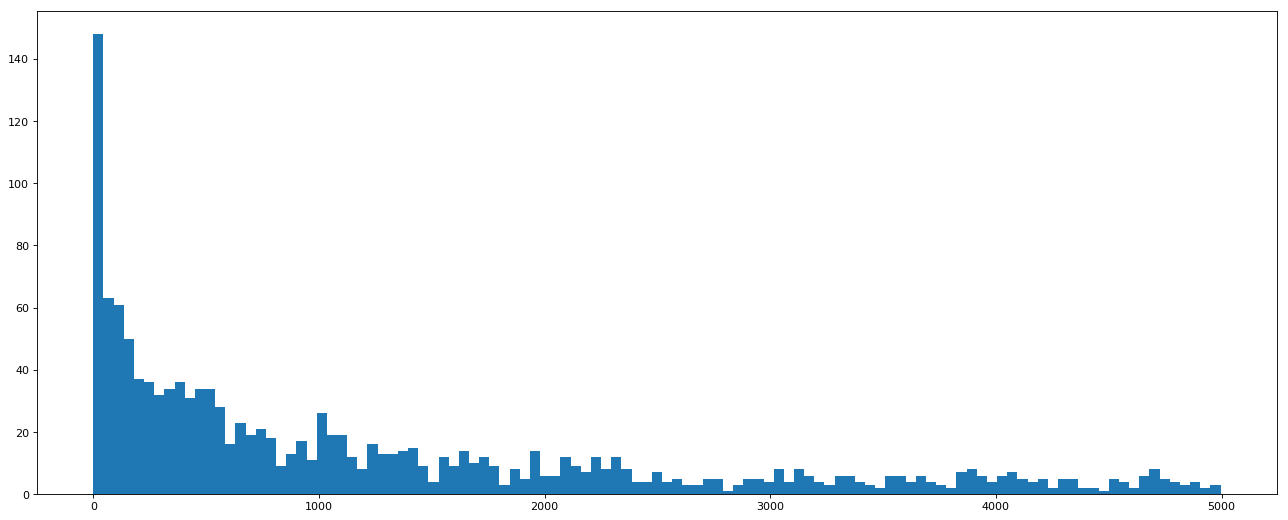

In [54]:
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"

t_us = np.loadtxt(us_file_path,delimiter=",",dtype="int")

#取评论的数据
t_us_comments = t_us[:,-1]

#选择比5000小的数据
t_us_comments = t_us_comments[t_us_comments<=5000]

# print(t_us_comments.max(),t_us_comments.min())
# 4995 0

d = 45

bin_nums = (t_us_comments.max()-t_us_comments.min())//d

#绘图
plt.figure(figsize=(20,8),dpi=80)

plt.hist(t_us_comments,bin_nums)

plt.show()

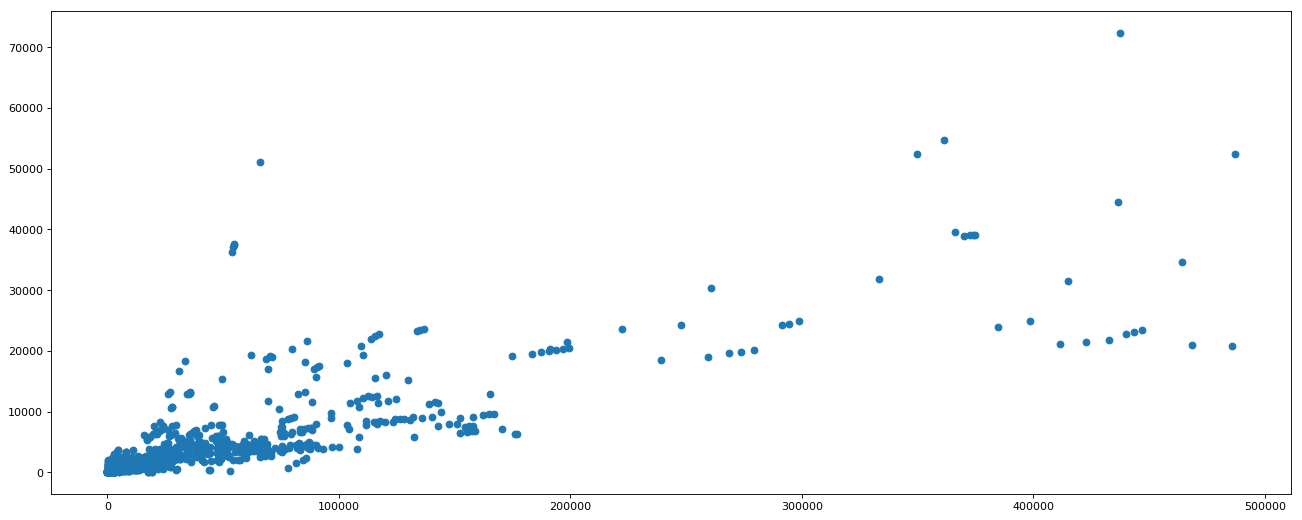

In [55]:
t_uk = np.loadtxt(uk_file_path,delimiter=",",dtype="int")

#选择喜欢数比50万小的数据
t_uk = t_uk[t_uk[:,1]<=500000]

t_uk_comment = t_uk[:,-1]
t_uk_like = t_uk[:,1]

plt.figure(figsize=(20,8),dpi=80)
plt.scatter(t_uk_like,t_uk_comment)

plt.show()